In [12]:
import geopandas as gpd
import pandas as pd
df = gpd.read_file("covid.geojson")

In [13]:
df.replace(-999, 2, inplace=True)
df = df[df["GEOID"].str.fullmatch(r"\d+")]

<AxesSubplot:xlabel='POP', ylabel='DTH_CUM_CP'>

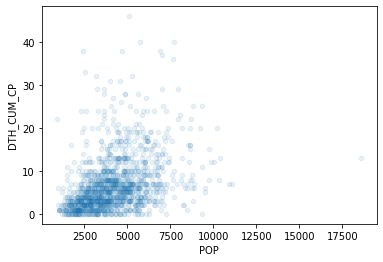

In [14]:
df.plot.scatter(x="POP", y="DTH_CUM_CP", alpha=0.1)

In [15]:
xcols = ["POS_CUM_CP"]
df[xcols].head()

,POS_CUM_CP
0,328
1,914
2,1199
3,578
4,195


In [16]:
ycol = "DTH_CUM_CP"
df[ycol].head()

0     0
1     6
2    19
3     7
4     0
Name: DTH_CUM_CP, dtype: int64

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[xcols], df[ycol])

#predictions = pd.DataFrame({"POP": [1000, 2000]})
#predictions["y"] = model.predict(predictions[xcols])
#predictions

LinearRegression()

In [18]:
model.coef_, model.intercept_

(array([0.00878335]), 1.0789145323191542)

In [19]:
# predict line
predictions = pd.DataFrame({"POP": range(0, 18000)})
predictions["y"] = model.predict(predictions[xcols])

# scatter background
ax = predictions.plot.line(x="POP", y="y", color="red")
df.plot.scatter(x="POP", y="DTH_CUM_CP", ax=ax)

KeyError: "None of [Index(['POS_CUM_CP'], dtype='object')] are in the [columns]"

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
train, test = train_test_split(df)

xcols = ["POP"]
ycol = "DTH_CUM_CP"

model = LinearRegression()
model1_scores = cross_val_score(model, train[xcols], train[ycol], cv=5)
print(model1_scores)
model1_scores.mean()

[0.1502902  0.15867281 0.20769264 0.02907247 0.17209873]


0.14356536989488705

In [21]:
xcols = ["POS_CUM_CP"]
ycol = "DTH_CUM_CP"

model = LinearRegression()
model2_scores = cross_val_score(model, train[xcols], train[ycol], cv=5)
model2_scores.mean()

0.20542295032398084

Text(0, 0.5, 'Explained Variance')

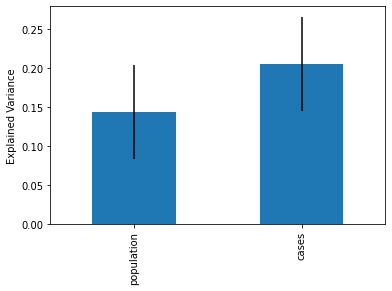

In [22]:
compare = pd.DataFrame({
    "scores": {"population": model1_scores.mean(), "cases": model2_scores.mean()},
    "stddev": {"population": model1_scores.std(), "cases": model2_scores.std()},
})
ax = compare["scores"].plot.bar(yerr=compare["stddev"])
ax.set_ylabel("Explained Variance")

In [23]:
f"deaths = {model.coef_[0]} * population + {model.intercept_}"

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [24]:
predictions = pd.DataFrame({"POP": range(0, 18000)})
predictions["y"] = model.predict(predictions[xcols])
ax = predictions.plot.line(x="POP", y="y", color="red")
df.plot.scatter(x="POP", y="DTH_CUM_CP", ax=ax)

KeyError: "None of [Index(['POS_CUM_CP'], dtype='object')] are in the [columns]"

In [25]:
before = df[ycol].var()
before

39.239011357908396

In [26]:
after = (df[ycol] - model.predict(df[xcols])).var()
after

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [27]:
reduction = before - after
reduction / before

NameError: name 'after' is not defined

In [28]:
model.score(df[xcols], df[ycol])

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [29]:
train, test = train_test_split(df)

model.fit(train[xcols], train[ycol])
model.score(test[xcols], test[ycol])

0.19320601742652177

/home/trh/.local/lib/python3.8/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- POP
Feature names seen at fit time, yet now missing:
- POS_CUM_CP

  warnings.warn(message, FutureWarning)


<AxesSubplot:xlabel='POP', ylabel='DTH_CUM_CP'>

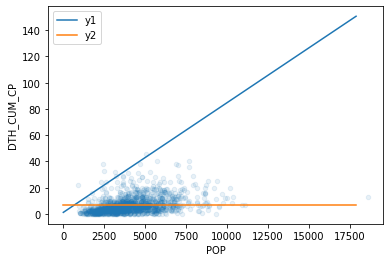

In [30]:
fit_line = pd.DataFrame({"POP": range(0, 18000, 100)})
fit_line["y1"] = model.predict(fit_line)
fit_line["y2"] = df["DTH_CUM_CP"].mean()
#model.predict(pd.DataFrame({"POP": range(0, 17500)}))
#model.score(df[xcols], df[ycol])

ax = df.plot.scatter(x="POP", y="DTH_CUM_CP", alpha=0.1)
fit_line.plot(x="POP", y="y1", ax=ax)
fit_line.plot(x="POP", y="y2", ax=ax)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

0.6654281529926065


<AxesSubplot:>

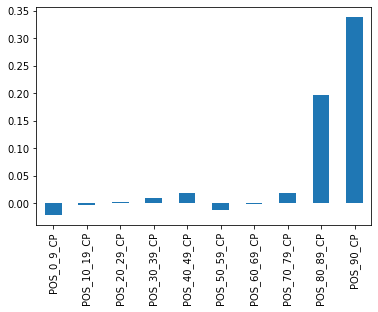

In [69]:
train, test = train_test_split(df)
model = LinearRegression()
xcols = ['POS_0_9_CP', 'POS_10_19_CP', 'POS_20_29_CP',
         'POS_30_39_CP', 'POS_40_49_CP', 'POS_50_59_CP', 'POS_60_69_CP',
         'POS_70_79_CP', 'POS_80_89_CP', 'POS_90_CP']
model.fit(train[xcols], train["DTH_CUM_CP"])
print(cross_val_score(model, train[xcols], train["DTH_CUM_CP"]).mean())
pd.Series(model.coef_, index=xcols).plot.bar()

In [70]:
model.intercept_

0.27406544801914645

In [ ]:
model.intercept_